# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**
- When ran the default agent.py code. During the Smartcab did not move at all. From the simulation results I can witness the messages like "No action taken." or "Agent Ideled". And in agent.py from **choose_action** method, action is NONE and from **build_state** method the state is NONE. So the smartcab is in idle position. 


- Based on the actions perfomed by smartcab on various scenarios, the smartcab has recieved various rewards. If the performed action falls under accepted type the smartcab recieves positive reward and if those actions falls under violations or unaccepted actions the smartcab recieves negative rewards. From environment.py it is analysed that higher the intense violations result in higher penalty as rewards (negative). During this time of the default agent.py, as smartcab is idle, it recieved positive rewards during a red signal and negative rewards or penalty otherwise. As no deadlines enforced, penalties are not based on time. As smartcab performs no action. While on green light, all violations considered to be minor violations with violation = 1.


- While on red light the smart cab recieves positive rewards. When on the green light, the smartcab recieves negative rewrads .i.e. penalty. As **state** and **action** chosen to be None. As the smartcab is idle. which is okay on red light but on green light all those violations are considered as minor violations with type 1. As no deadlines are enforced, penalties are not timely based. Penalties could be severe based on the type of violation.


### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**
- From agent.py, the 3 flags I choose to set are **enforce_deadline:** It enables the deadline metric. This in turn modifies LearningAgent's build_state method in obtaining the optimized learned state. Thereby changes the Choosen_actions and the learning process of the smartcab. And rewards are also scaled accordingly for optimized simulation. The second flag to be chosen is **epsilon:** It is a random exploration factor which modifies the state and action chosen while performing a simulation. It randomly choose an action with epsilon probability. Best actions can be learned by adjusting epsilon effectively and obatining optimized simulation. And the other flag to be chosen is **alpha:** It is learning rate value. It determines to what extent the newly acquired information will override the old information. A factor of 0 will make the agent not learn anything, while a factor of 1 would make the agent consider only the most recent information. Optimized simulation can be obatined by effective learning rate. It varies accordingly in fully deterministic or stochastic environments. Both alpha and exploration provide a balance between the exploitation and exploration of reinforced learning constraints. 


- In environment.py, when an agent performs an action,  **act** class function is called. It considers an action and perform the action if it is legal. And provides a reward for the agent based on traffic laws. 


- In simulator.py, **render()** is the GUI render display of the simulation, where supplementary trial data can be found from render_text. And **render_text()** is the non-GUI render display of the simulation, where simulated trial data will be rendered in the terminal/command prompt.


- In planner.py, the RoutePlanner's **next_waypoint()** function first checks if destination is at location. If not then it checks for cardinally East-West direction first and if not then it checks for North-South direction. On a whole it considers **East-West** direction first. 

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


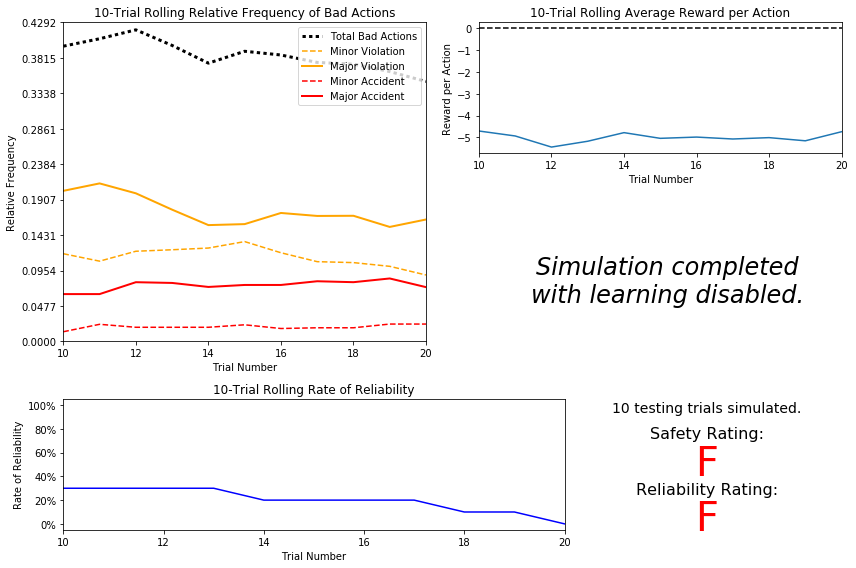

In [13]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**
- For all the 10 trails, the driving agent is making bad decisions with a relative frequency between 0.37 to 0.43. On an average, a relative frequency 0.40 (approx) has a bad decision for all tails. All the trails include a bad decision with average relative frequency of 0.40. That is in each trail, the 40% choices are bad choices. Almost all those decisions have caused accidents (include major and minor accidents). That is the relative frequency of major accidents is in between 5 - 9 percent. And the minor caused on an average relative freuncy of 2% (approx.)


- As agent is driving randomly, the rate of reliability for all the 10 trails is less than 35%. It does not make any sense to use this agent in real-world. As the chances of having a miserable journey with this agent is greater than 65%. And the reliablity rating is **F**. Per letter grade system, agent failed to reach destination for more than 60% of trips. This agent is highly prone to cause an accident in journey. It is highly recommended NOT to use this agent in this present scenario. 


- For all the 10 trails, each trail has an rolling average reward per action in **negative** .i.e. penalities. It is indicates that all the trails have penalties per action in between -4 to -6 respectively. This indicates that there a lot of either minor violations or major violations or considerable number of minor accidents in every trail. Or some major accidents can make that trail pay heavily. Yes, these rewards indicate that actions were penalized heavily.


- No, we cannot comment on this. Because, if we consider the rate of reliability. for trails 10 -> 13 it is constant. From 13 to 14 the rate has decreased by 10%. From 14 -> 17 again the rate is constant. And from 17 -> 20 it is decreasing while being constant at 18 to 19. As number of trails increases the outcomes are almost regular. No significant changes. 


- From the safety rating and reliability I consider this Smartcab as unsafe and unreliable for its passengers. Both the ratings are **F**. which means that this smart cab causes atleast one major accident or other traffic violations. And this smartcab did not reach destination for more than 60% of trips (trails) based on the rating obtained. The journey in this cab could be a serious threat to safety of passenger and it is highly unreliable to reach destination by this cab. So, I would NOT consider this smartcab as safe and reliable in this situation. (As we did not define any "State" at this moment.)  

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**
- I consider features like 'waypoint' and 'inputs'(few sub-features are relevant for learning both safety and efficieny. The smartcab can move in either Forward, Left or Right directions. Smartcab needs to meet passenger's requirements effectively and safely. 


- For Safety:
    - These features determines the safety of the passenger all through the journey. Better information make smartcab to avoid accidents and traffic violations. So, **inputs** data is crucial for the safety.
    - **'light'** - (green/red) color  determines whether the cab should be in motion or in idle position. And to avoid violations/accidents.
    - **'left'** - indicates the intended direction of vehicle at smartcab's left. (When making a right turn on red signal, we need to know intended direction cab's left side vehicle.) It determines whether smartcab can make right turn or not. And to avoid violations/accidents.
    - **'oncoming'** - indicates the intendend direction of vehicle across intersection of smartcab. (When making a left turn of green light, we need to know the intended direction of vehicle across the intersection for the cab.) It determines whether smartcab can make left turn or not. And to avoid violations/accidents. 
   
   
- For Efficiency:
    - This feature determine effciency of smartcab in reaching the destination effectively or serving the the customer/passenger in best way by meeting their requirements effectively. 
    - **'waypoints'**: It determines the smartcab is choosing an efficient direction in reaching the destination. Such that smartcab is moving in a right path to reach destination. If chosen a wrong path, reliability will be affected.      
    
- These features are appropiate for modeling the smartcab for safety nd efficiency in the environment such that Smartcab will meet passenger's requirements effectively and safely where safety of passenger has highest priority anytime. Such that passenger can travel to destination safely and reliably after necessary modeling takes place.


- **Unused Feature**:
    - **right**: of inputs is unsed for modeling. Because any smartcab can move in forward, left or right directions. The cab can move forward or left only on Green light. Moving on red light is blunder. So, if the light is green and smartcab moves forward, according to right of way, vehicle at right needs to stop/idle before taking a right turn while smartcab going forward. while smartcab making right, right-vehicle direction is not needed. While smartcab making a left turn. It needs the direction of left-side vehicle and oncoming vehicle. Based on these features the **right** sub-feature of inputs is neglected. 
    - **deadline**: Though it is tempting feature to select for measuring efficiency. As when try try to enforce deadlines while making decisions. The decision making is affected by the remaining amount of time. There is a possibility of making wrong decisions resulting in violations or accidents. Here higher priority is given to make agent reach the decision than making wrong decisions due to hurry caused by enforced deadlines. 

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**
- For the state-space I have considered inputs (light, left and oncoming) and waypoints. The different possibilities of light are 2. i.e. either red or green. The different possibilities for vehicles on left side are 4. .i.e. (None, left, right or forward). Similarly for oncoming vehicles the different possibilities are 4. .i.e. (None, left, right or forward). The different possibilities for a waypoint are 3. i.e. (left, right or forward).
- The total possibile combinations for all possible independent states are 2x4x4x3 = 96. Therefore I consider The statespace size id 96. But for each state there could be 4 possibile different actions associated ,they are (None, left, right or forward). Therefore the total size of the [action,Qvalue] pairs is 96x4 = 384. 
- After analyzing the TrafficLight and Environment classes in environment.py along with simulator.py. And considering the size of the statespace as 96 (with states and possible action->QValue pairs) is reasonable as it is feasible for the agent to learn a policy for each possible state within the reasonable number of trails taken place before testing the module.  As the optimal choices are made accordinly based on the Q-Values obtained. And those Q-Values are updated based on the rewards recieved. Implementing an efficient model could result an intelligent model for decision making and learning from those designated states exploiting/exploring all possible scenarios through trails.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

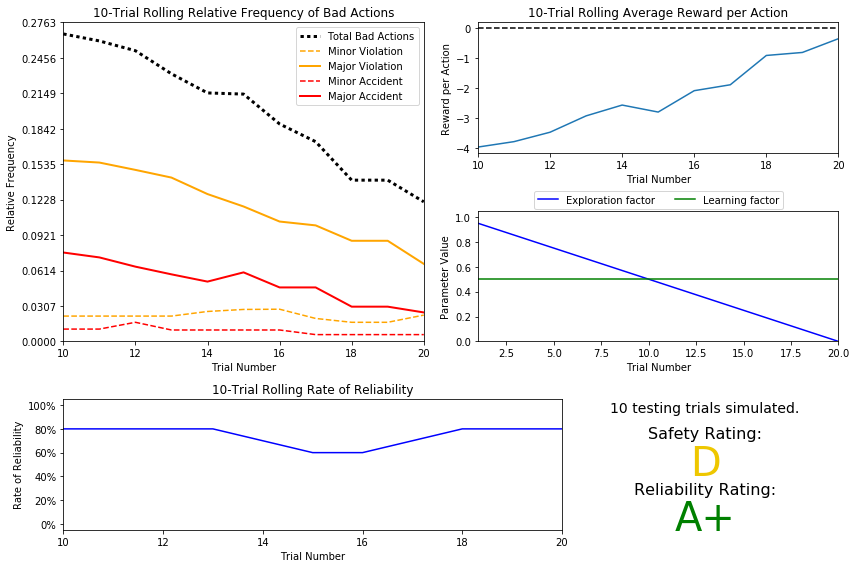

In [18]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**
- While comparing the default Q-Learning simulation and basic agent driving simulation. It is observed that there is a significant improvement for all the patterns compared. The total bad actions/violations/accidents have lower values as the number of trails go higher. The rate of reliability is higher in default Q-learning than the basic agent driving. Rewards per action are relatively higher in default Q-Learning than the basic agent driving. Also the safety rating and reliability rating are much better in default - Q learning. 


- Before testing the driving requires 20 trails in order for learning. Yes, this number makes sense for given epsilon and tolerance. As by default the epsilon value is 1.0 and we are reducing it by 0.05 for every trail. So, 20 trails it comes down to 0. The default value of epsilon tolerance before beganing the testing is 0.05. So, by 20th trail the epsilon value turns out to be less than this tolerance value of 0.05. So, this 20 trails makes sense. This resulted in better rating values than basic agent driving simulation. 


- The implemented decaying function is linear. Considering the exploration factor and the learning factor graph. The 20 trails for the epsilon to decay from 1 to 0 is capture appropiately. Yes, the decaying function implemented accurately represented in the parameters panel. 


- As the number of trails increased the number of bad actions have been decreased. And yes, the average reward has been increased when compared to basic agent driving situation. 


- In the initial driving agent simulation both the safety rating and the reliability rating are **F**. But in this default Q-Learning simulation, the safety rating is **D** and the reliability rating is **A+**. Though reliability rating is decent. There are concerns for safety which means that "Agent causes at least one minor accident,such as turning left on green with oncoming traffic." per the safety rating. But for reliability rating on the test cases, "Agent reaches the destination in time for 100% of trips." per reliability rating. Though this model is not the final BEST design. But it is much better the previous agent driving simulation. 

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

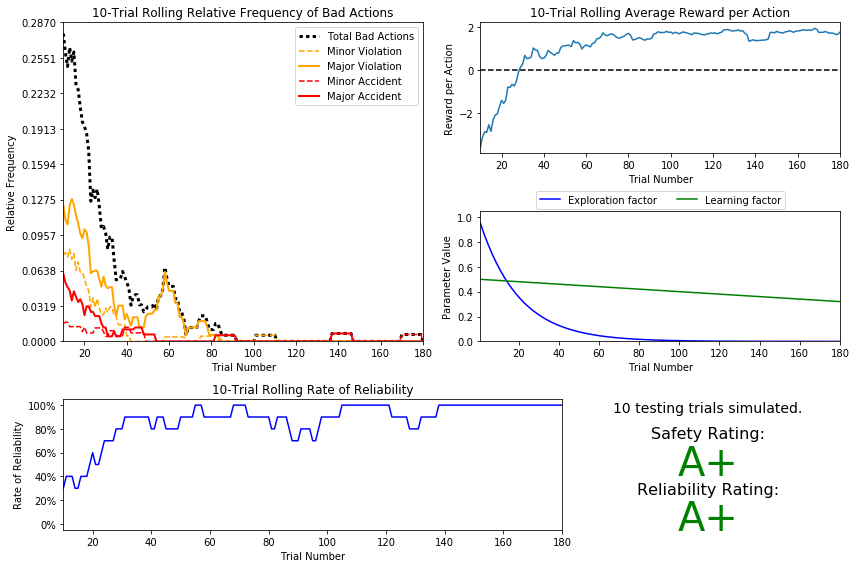

alpha=0.5(initially), epsilon=epsilon*0.95, tolerance=0.0001


In [3]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')
print "alpha=0.5(initially), epsilon=epsilon*0.95, tolerance=0.0001"

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**
- The decaying function used for the epsilon is ϵ = a^t,for 0 < a < 1. (epsilon=epsilon*0.95) In this case a=0.95 and t is number of trails used. The decaying function converges to zero around 90th trail. As the learning begins, we expect want agent to take random actions to explore more paths. But as the agent gets better, the Q-function converges to more consistent Q-values. Now we would like our agent to exploit paths with highest Q-value i.e takes greedy actions. 


- Around 180 trails were done by the agent before begining the testing. 


- Epison-Tolerance used is 0.0001 and alpha (learning rate) used is 0.5(Initially). In order to keep the convergence gauranteed and exploration to dimish over time. I have chosen tolerance value of 0.0001. And to obtain considerable number of trails to enable the agent to learn rules through possible state combinations from those trails. The alpha learning is made as 0.5 then tried to reduce the alpha by a very smaller value for every trail. I did this such that model will consider the previous data effectively without much bias.By the end of training the model's alpha is around 0.4. I have chosen this modification to make sure that with a fix alpha the agent is able to adjust when the environment changes. Also learner will keep track of the new information and previous information in efficient manner. 


- With this Q-learner the safety rating is **A+** and the reliability rating is **A+**. They are the best possible ratings provided for any simulation. Those are pretty good ratings compared to the default Q-learning simulation or the initial driving agent simulation. The safety rating has been improved a lot. But the reliability rating is consistent. And the agent with this learing can perform very well in ideal conditions. The number of bad actions has dratically reduced as the trails increased. And lower amount of violations and accidents are witnessed. The average reward per action is in positive quadrant for all the trails greater than 30. And the rate of reliability is 100% for all trails greater than 140. This model with Q-Learning has achieved best possible ratings. This is huge improvement from both default Q-Learning and basic driving agent simulation.


- Yes, the Q-learner results show that the driving agent has very succesfully learned from the state combinations and their associated policies. Which is evident from the safety and the reliability rating (A+ and A+) respectively. And this is a definitely a better model than the previous default Q-Learning model. 


- Yes, Based on the safety and reliability ratings of the smartcab I am satisfied with model of agent. Per the safety rating - "Agent commits no traffic violations, and always chooses the correct action." Based on the reliability rating, "Agent reaches the destination in time for 100% (all) of trips."

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 
1) For the given environment. The optimal policy is dependent on the type of **light** and the **action** to be chosen. 
    - When light is **Green** , the agent can drive in "left", "right" or "forward" directions. It can be rewarded in respective manner depending on waypoint recommendations. But the agent cannot be idle .i.e. "None" action. If the agent choose None. It should be penalized but in lower value. 
    - When light is **Red**, the cannot MUST NOT drive in "forward" or "left" directions. If not agent must be penalized heavily. If the agent stays idle .i.e. "None", it should be rewarded accordingly. The agent can make a "right" action if vehicle on left is NOT in forward direction. Basic optimal policy while on redlight is to STOP. The sub-optimal policy could be like taking a right turn during a red light with possible circumstances. The reward/penalty can be awarded as per the action. These should be the features needed to be present in the optimal policy. 
    
    
    
2) After analyzing the 'sim_improved-learning.txt' file, it is observed that for all the states those have been recorded from the simulation, the policy (the action with the highest value) correct for the given state. All the traffic safety rules have been followed to avoid accidents. Optimal policy rules have been follwoed by the agnet in all the cases. But there are some suboptimal policy cases where the expected result differs from the obatined result. Such as right turn action on a red signal with vehicle on left side going in forward direction. Or when oncoming vehicle making a left turn. This is a confusing situation for the agent to decide and act.  



3) The states were designed in such way like they include the traffic light color, movement direction of left sided vehicle, movement direction of oncoming vehicle and way point. .i.e **(("Traffic light", "Oncoming vehicle Traffic Direction", "Left vehicle Traffic Direction"), waypoint)**. The examples which depict that smartcab learned the optimal policy features are :
      - (('red', 'forward', 'left'), 'left')
            -- forward : -19.90
            -- right : 0.00
            -- left : 0.00
            -- None : 1.86
        In this case, the traffic light is red. Agent can either go right or STOP. But when tried to go forward the the state learned that agent will be penalized heavily. When halted it was rewarded with a positive score. With the highest Q-Value of 1.86. Though the waypoint is "left". The agent choses to STOP. Beacuse agent can't make left turn when on RED light. And avoided accident. Which is acceptable per optimal policy. This shows that smartcab has learned the optimal policy. 
        
       - (('green', None, 'forward'), 'forward')
            -- forward : 1.79
            -- right : 0.22
            -- left : 1.02
            -- None : -2.33
         When on GREEN light, the agent/vehicle can either go "left", "right" or "forward". But it SHOULD NOT STOP. The agent when tried to move "forward", "left" and "right". It was awarded with positive value that is rewarded. When agent HALTED on  green light, it is a violation and the agent is penalized. Based on the highest Q-Value of 1.79, the agent takes a "forward" choice and agrees with the waypoint direction. This shows that smartcab has learned the optimal policy. 
         
       - (('red', None, None), 'forward')
            -- forward : -9.95
            -- right : 0.50
            -- left : -9.56
            -- None : 1.57
         When on RED light, the agent MUST either STOP or take a right turn depending on circumstances. When tried to go "forward"and "left", the agent is penalized heavily according to the optimal policy. When tried to choose "right" or "forward" options, the agent is awarded positive values that is rewards. Based on the highest Q-Value the agent chooses to take "None" as action which is acceptable per optimal policy. This shows that smartcab has learned the optimal policy. 
         
         
  
4) There is one entry where the smartcab didn't perform per expectations of the smartcab. This is an issue related to sub-optimal policy. 
      - (('green', 'forward', 'forward'), 'forward')
        -- forward : 0.00
        -- right : 1.37
        -- left : 0.00
        -- None : 0.0
         
    In this case the traffic light is "Green" for the agent. Usually the agent can make "Forward", "Left" or "Right" choices when on green light. But it cannot stay idle or be halted. If the agent is Idle, the agent must be penalized in this scenario. Overhere the maximum Q-Value is 1.37 for a "Right Turn" choice. The agent can make a "Right" freely when on GREEN light and also it can make a "Right Turn" on RED light as well depending on circumstances. In this case, the "forward", "left" and "None" choices were given equal rewards that their deafult value of zero. But according to optimal policy None should be penalized and have negative score. Or atleast "Forward" and "Left" options have higher values than 0.0. Though for this state the "Right" turn is an output. It may acceptable as it doesn't cause any violation/accident but its not the optimal output per the requested waypoint. It can make a "forward" choice as well according to the right of way rules. 
    
    The reason for this issue is smartcab might not got a chance to learn this situation again. That is it could not get a chance to analyze the result of making a None choice similarly earlier. Such that it would have been penalized the agent. Agent might not got a full scope to exploit the statespace, As we focussed more on decaying function decay to tolerance level. The learner might not got a chance to verify sufficient states during the exploration state to make informed decisions about all possible scenarios. We need more trails or another efficient decaying/learning functions to make a optimal Q-Table.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

- Considering the smartcab itself, the smartcab learning is based on the statespace. And this statespace is dependent only on limited features. There could be many factors affecting the reachability of destination they are Traffic/Road conditions/etc. These factors are varying all the time. If we use these features as part of statespace. An unintentional bias may be generated resulting in overfitting of data. The behavior of these features can be learned from immediate rewards. Future rewards in this scenario can be useless. Agent is concerned more about the next waypoint than determing the whole path to destination. Thus future rewards in determining the destination are not useful.


- Considering the environment, the destination varies for each trail and test cases. The states choosen/generated at all the steps are completely independent. Traffic lights, neigbouring vehicles direction is not dependent on previous values. Only waypoint has a possibility to to detrmine its next action based on previous value. Adding future rewards in this scenario could backfire with misrepresenting dataset. Thus future rewards won't work for this project. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.